In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os
from astropy.table import Table, vstack

In [ ]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [ ]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

In [ ]:
data_path = "/sps/lsst/users/bbiswas/MADNESS_results/"
run_name = "catsim_low_density_ssim_20" # 8 to 15 galaxies
result_dir_path = os.path.join(data_path, run_name)

In [ ]:
madness_results=[]
scarlet_results=[]
actual_photometry = []
blended_photometry = []

for file_num in range(4):

    madness_results.append(pd.read_pickle(os.path.join(result_dir_path, "madness_results", str(file_num) + ".pkl")))
    scarlet_results.append(pd.read_pickle(os.path.join(result_dir_path, "scarlet_results", str(file_num) + ".pkl")))

    actual_photometry.append(pd.read_pickle(os.path.join(result_dir_path, "actual_photometry", str(file_num) + ".pkl")))
    blended_photometry.append(pd.read_pickle(os.path.join(result_dir_path, "blended_photometry",  str(file_num) + ".pkl")))

madness_results = pd.concat(madness_results)
scarlet_results = pd.concat(scarlet_results)

actual_photometry = pd.concat(actual_photometry)
blended_photometry = pd.concat(blended_photometry)

In [ ]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [ ]:
scarlet_results

,u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,...,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
0,0.997830,4174.720537,3358.822909,0.466214,0.997781,39963.497696,41422.787940,0.424744,0.997718,160378.651599,...,0,67589.956588,4790.684186,0,-0.195438,0.036516,-0.260612,-0.163743,-0.127341,-0.279217
1,0.987004,1038.079634,883.982078,0.602536,0.986378,45992.641803,38516.664532,0.249773,0.985534,100291.508781,...,0,20248.552579,4791.904276,0,-0.148445,-0.162547,-0.206863,-0.133292,0.176367,0.617732
2,0.999819,7409.172734,5466.865700,0.002585,0.999806,100889.700146,103899.724690,0.001589,0.999780,407350.040419,...,0,151557.984900,4795.562684,0,-0.262149,0.029835,-0.006389,0.020341,0.014815,-0.068132
3,0.996774,3407.119590,3661.016988,0.520547,0.996277,27409.405507,27617.577016,0.562122,0.995518,77119.662098,...,0,72021.498685,4793.124056,0,0.074520,0.007595,0.505132,0.418474,0.265547,0.575730
4,0.996463,1660.370492,1942.557906,0.000634,0.995992,15618.520226,14870.047873,0.000794,0.995278,49917.058211,...,0,19990.532360,4801.653837,0,0.169954,-0.047922,-0.020530,0.061435,-0.019353,0.104501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.998958,3667.618986,3209.085119,0.004303,0.998869,34726.305251,36287.107444,0.006945,0.998724,114407.570195,...,0,40171.975830,4740.885641,0,-0.125022,0.044946,0.020933,-0.014902,0.038632,-0.049842
8,0.998470,6324.125555,6285.559270,0.002430,0.998246,50005.386447,51770.357792,0.004963,0.997902,140239.975170,...,0,66629.003866,4749.331048,0,-0.006098,0.035296,0.036083,0.036577,-0.032867,0.043247
9,0.999721,467.535769,133.296484,0.079039,0.999696,23219.593798,22004.995124,0.018549,0.999635,185639.888667,...,0,184465.599687,4739.677926,0,-0.714896,-0.052309,-0.051693,-0.054048,-0.047004,0.004467
10,0.998492,3807.205014,4558.489975,0.001041,0.998341,31433.625098,34816.908087,0.002321,0.998113,104028.054740,...,0,38277.648490,4749.331048,0,0.197332,0.107633,0.091009,0.081899,0.081522,0.059405


In [ ]:
actual_photometry

,u_phot_flux,u_phot_fluxerrs,u_phot_flags,g_phot_flux,g_phot_fluxerrs,g_phot_flags,r_phot_flux,r_phot_fluxerrs,r_phot_flags,i_phot_flux,...,i_phot_flags,z_phot_flux,z_phot_fluxerrs,z_phot_flags,y_phot_flux,y_phot_fluxerrs,y_phot_flags,galaxy_num,field_num,file_num
0,3622.351406,345.207084,0,32974.923587,1363.752333,0,130228.888964,3193.017683,0,207981.591958,...,0,166985.465340,4449.376025,0,91411.336905,4790.684186,0,0,0,0
1,632.683715,345.295002,0,26376.203882,1364.099653,0,56728.303554,3193.830880,0,41860.634944,...,0,39158.007824,4450.509191,0,21608.880100,4791.904276,0,1,0,0
2,4914.642664,345.558619,0,73678.860334,1365.141083,0,303876.330986,3196.269229,0,372439.734827,...,0,284787.244431,4453.906959,0,151564.490801,4795.562684,0,2,0,0
3,3189.775689,345.382896,0,23591.468842,1364.446885,0,65570.122929,3194.643870,0,90705.572338,...,0,86435.663885,4451.642069,0,47112.618171,4793.124056,0,3,0,0
4,1621.880220,345.997535,0,10080.652876,1366.875037,0,36697.649686,3200.329016,0,51696.656947,...,0,40812.709199,4459.564153,0,19988.485540,4801.653837,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2198.420528,347.321129,0,27103.313738,1362.145769,0,91422.464900,3168.779088,0,107666.246847,...,0,72202.764875,4483.791469,0,40110.090435,4740.885641,0,7,228,36
327,3527.737570,347.939847,0,31214.705986,1364.572293,0,88603.178568,3174.423947,0,115907.899430,...,0,117131.195218,4491.778889,0,66538.909276,4749.331048,0,8,228,36
328,40.624301,347.232651,0,17939.642780,1361.798770,0,142151.268126,3167.971859,0,293158.545460,...,0,272521.570586,4482.649248,0,184342.408751,4739.677926,0,9,228,36
329,3333.721383,347.939847,0,27738.471660,1364.572293,0,89718.207348,3174.423947,0,110079.614283,...,0,76084.802996,4491.778889,0,38265.568985,4749.331048,0,10,228,36


### Plot the correlations

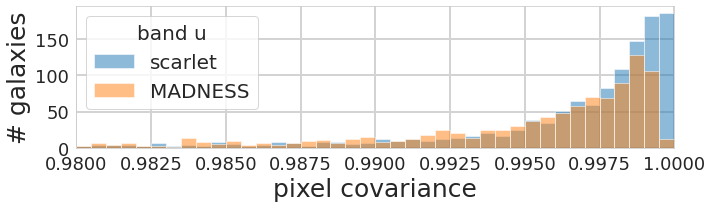

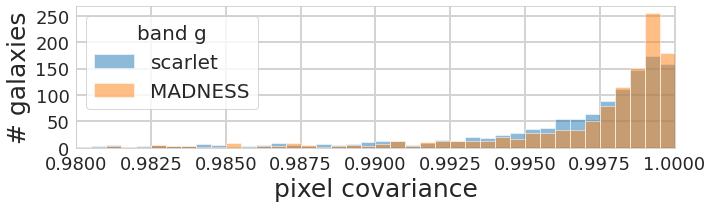

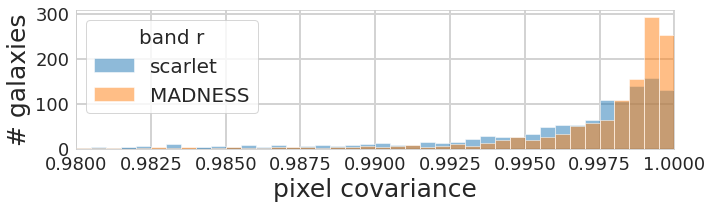

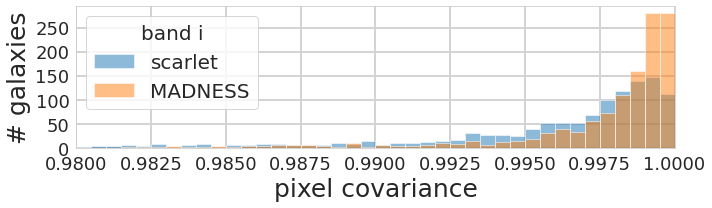

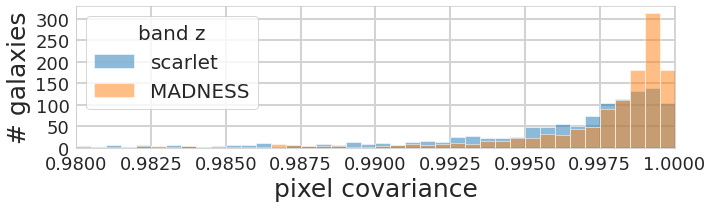

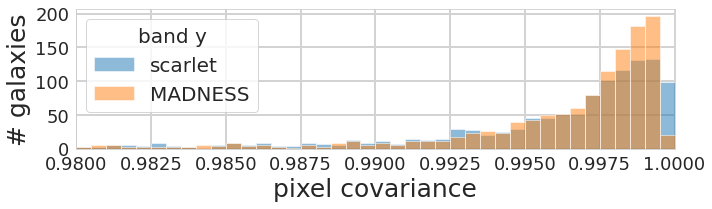

In [ ]:
bins = np.arange(0.95, 1, 0.0005)
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    plt.figure(figsize=(10, 3))
    cov_band = band
    sns.set_style("whitegrid")
    plt.hist(scarlet_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="scarlet")
    plt.hist(madness_results[cov_band + '_covariance'], bins=bins, alpha=0.5, label="MADNESS")
    plt.legend()
    plt.xlim([0.98, 1])
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("pixel covariance", fontsize=25)
    plt.ylabel("# galaxies", fontsize=25)
    plt.legend(fontsize=20, title="band " + band, loc="upper left", title_fontsize=20)
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.tight_layout()
    plt.savefig(result_dir_path + "/cov_res_"+band)
    plt.show()

# Plot the relative flux error

In [ ]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import norm

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.08101934054284618
Madness sig: 0.3452044110128915
Scarlet mu: -0.0009646292896874495
Scarlet sig: 0.19359947387897594


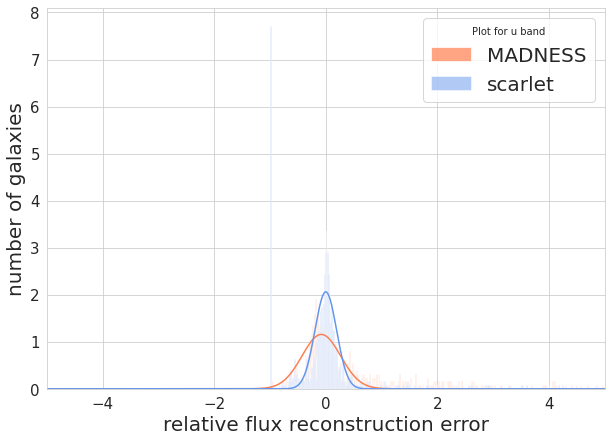

Madness mu: -0.022579836000251256
Madness sig: 0.12162179320313328
Scarlet mu: 0.0062305944806563904
Scarlet sig: 0.08401762113337902


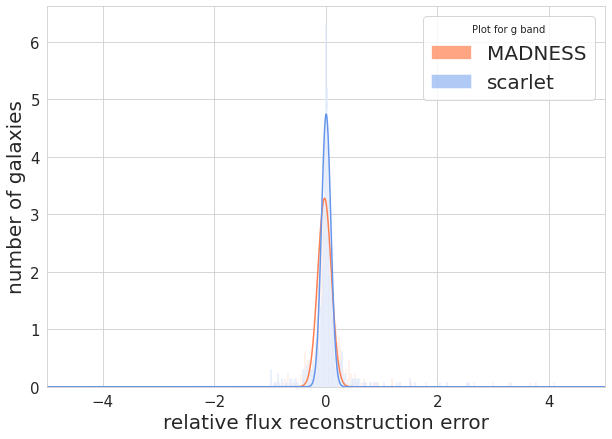

Madness mu: 0.0024788892176971526
Madness sig: 0.12547522370963066
Scarlet mu: 0.0049232575350617435
Scarlet sig: 0.08152106370905772


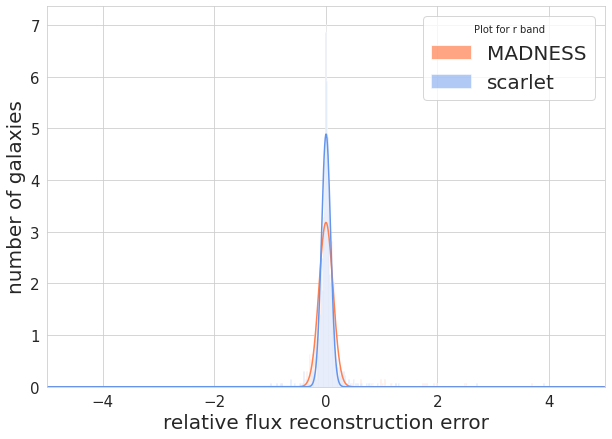

Madness mu: -0.021750333456418688
Madness sig: 0.08812628889276976
Scarlet mu: 0.01076649895277399
Scarlet sig: 0.07317441519267522


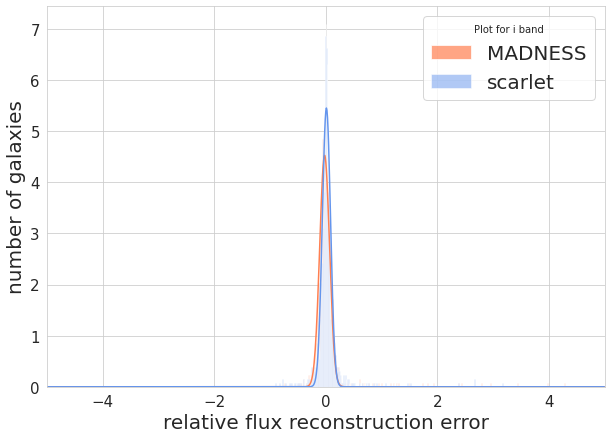

Madness mu: 0.0005313030335700826
Madness sig: 0.1316741252054008
Scarlet mu: 0.007978780659852556
Scarlet sig: 0.09503747685923782


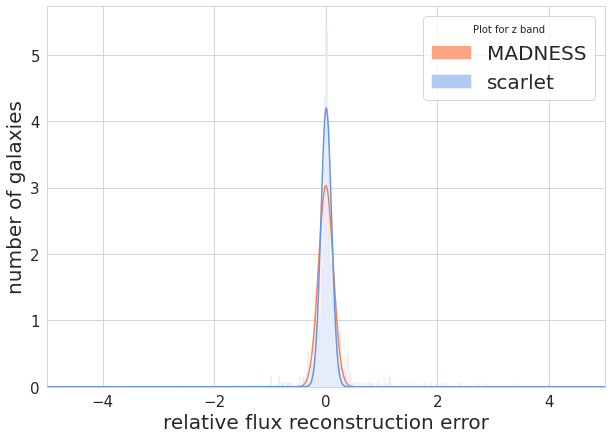

Madness mu: 0.01071698336305125
Madness sig: 0.21854636541373418
Scarlet mu: 0.010205887616043303
Scarlet sig: 0.13448800103269867


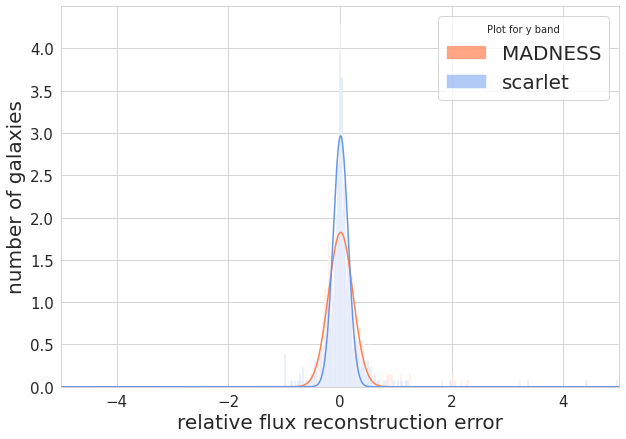

In [ ]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].values
    madness_predicted_flux = madness_results[band+"_predicted_flux"].values

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].values
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].values

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
#     sns.set_theme(style={"axes.grid": True,
#                      'axes.labelcolor': 'black',
#                      'figure.facecolor': '1.',
#                      'xtick.color': 'black',
#                      'ytick.color': 'black',
#                      'text.color': 'black',
#                      'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-5, 5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-5, 5])
    plt.show()

# Compare apperture photometry

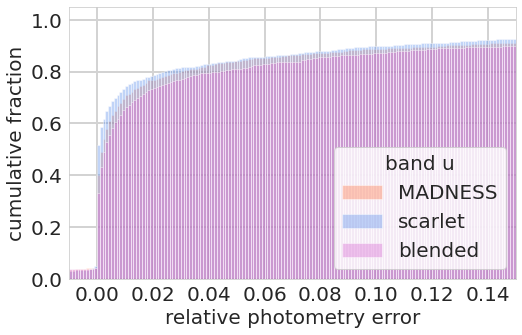

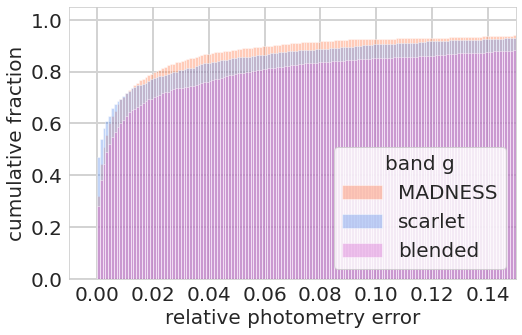

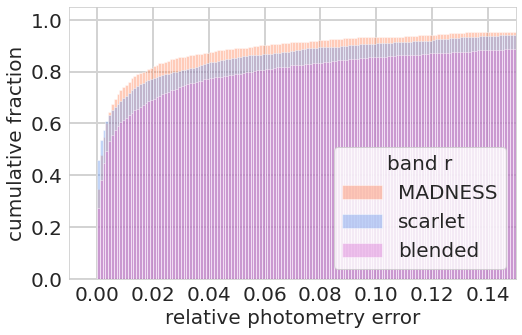

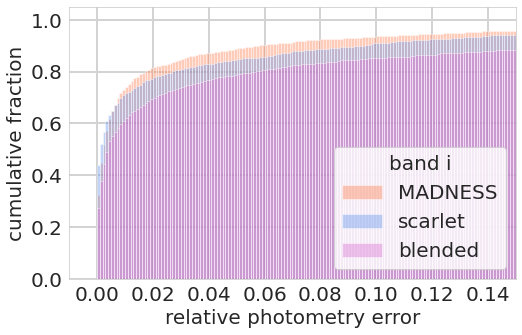

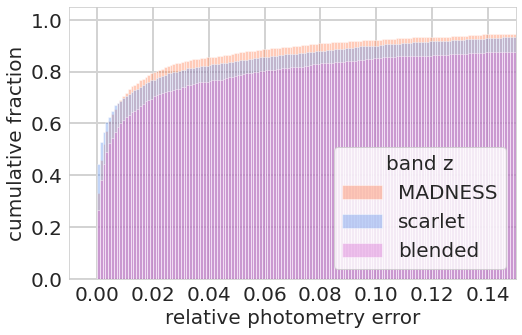

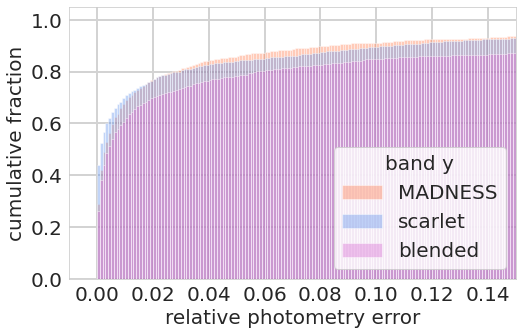

In [ ]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    #sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    sns.set_style("whitegrid")
#     sns.set_theme(style={"axes.grid": True,'grid.color': 'black',
# })
    plt.figure(figsize=(8, 5))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_results[band+"_phot_flux"].values - actual_photometry[band+"_phot_flux"].values)) / actual_photometry[band+"_phot_flux"].values,
        bins=bins,
        alpha=0.4,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_results[band+"_phot_flux"].values - actual_photometry[band+"_phot_flux"].values)) / actual_photometry[band+"_phot_flux"].values,
        bins=bins,
        density=True,
        alpha=0.4,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_phot_flux"].values - actual_photometry[band+"_phot_flux"].values) / actual_photometry[band+"_phot_flux"].values,
        bins=bins,
        alpha=0.4,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    ax = plt.gca()
    ax.grid(color='lightgray', linestyle='-', linewidth=2)
    plt.xlim([-.01, .15])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("relative photometry error", fontsize=20)
    plt.ylabel("cumulative fraction", fontsize=20)
    plt.legend(fontsize=20, title="band " + band, loc="lower right", title_fontsize=20)
    plt.savefig(result_dir_path + "/cumulative_distib_phot_err_"+band)
    plt.show()

# error variation plots

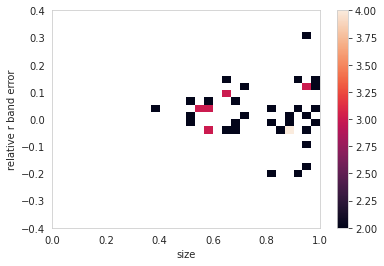

In [ ]:
h = plt.hist2d(madness_results['size'].values, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

Note that the SNR definition here is not the same as the one used to place cuts on the catalog.

u


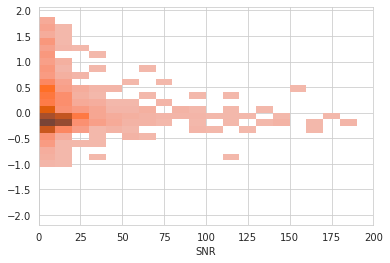

g


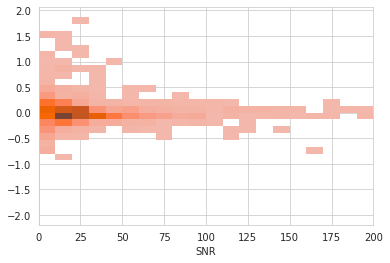

r


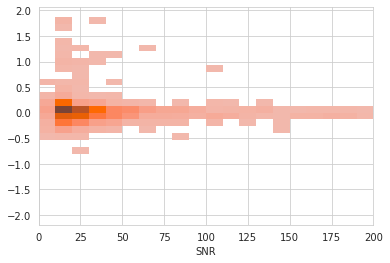

i


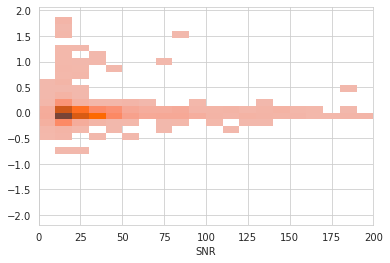

z


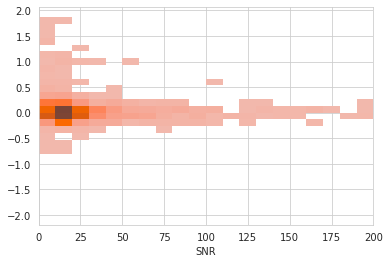

y


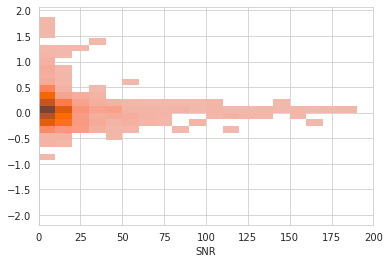

In [ ]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_phot_flux"].values / actual_photometry[band+"_phot_fluxerrs"].values
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,1000,1000/100.0)
    y_bins = np.arange(-2, 2, 4/30.0)
    print(band)
    sns.histplot(x=snr, y=madness_results[band + "_relative_flux_err"].values, bins=[x_bins, y_bins], kde=True, color='coral')
    plt.xlim(0,200)
    plt.xlabel("SNR")
    plt.show()

# Validate SNR vs mag 

Note that this is not the SNR definition used for making the cut

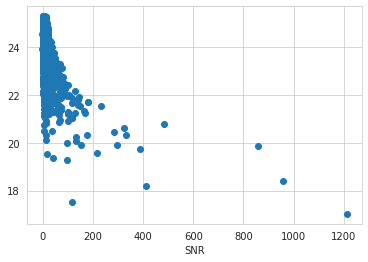

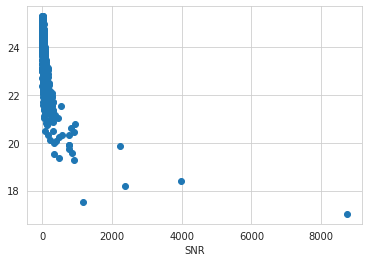

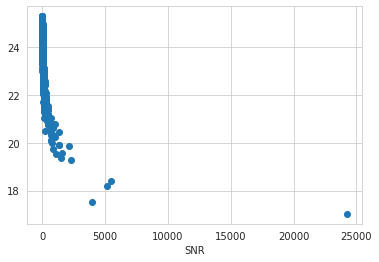

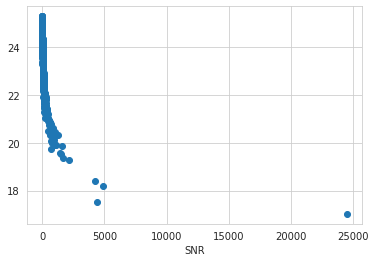

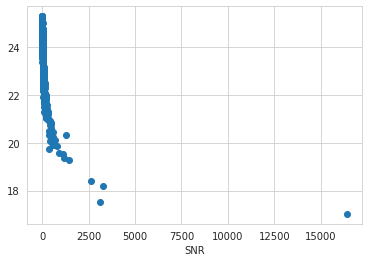

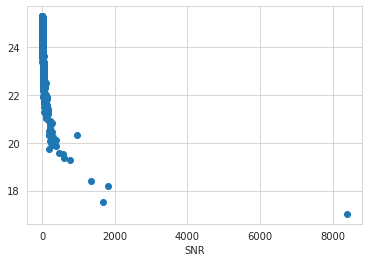

In [ ]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_phot_flux"] / actual_photometry[band+"_phot_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    plt.scatter(x=snr, y=madness_results["ref_mag"])
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.xlabel("SNR")
    plt.show()

Plot for u band


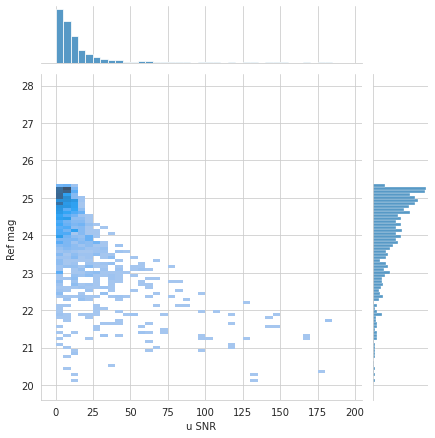

Plot for g band


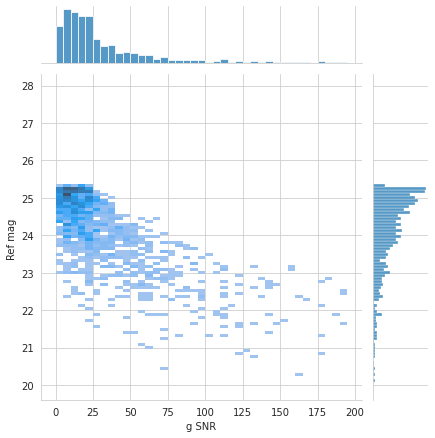

Plot for r band


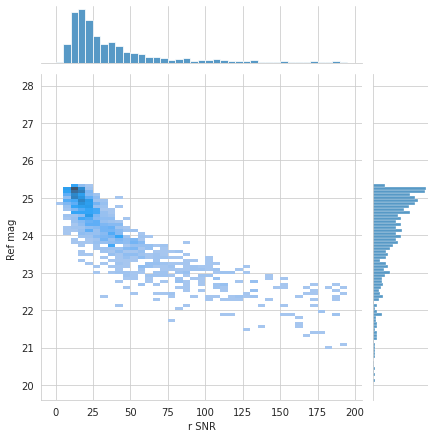

Plot for i band


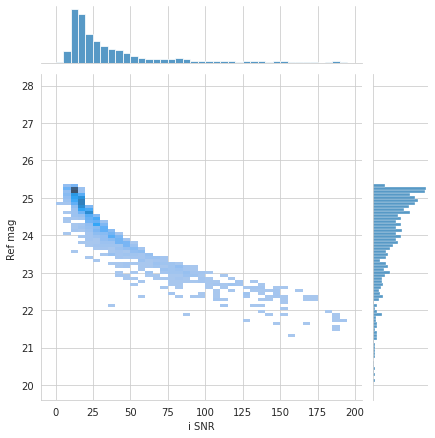

Plot for z band


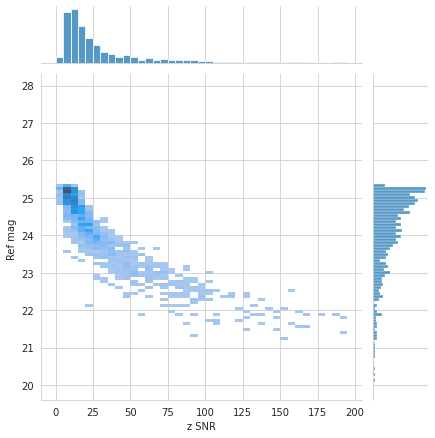

Plot for y band


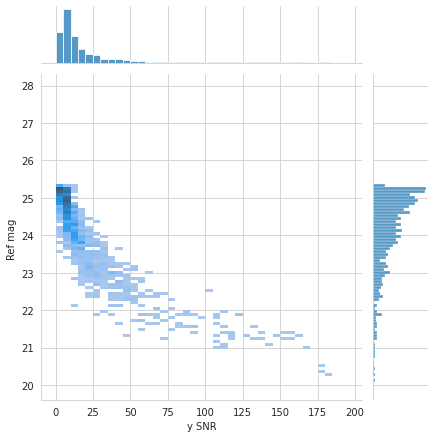

In [ ]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    print(f"Plot for {band} band")
    snr = actual_photometry[band+"_phot_flux"].values / actual_photometry[band+"_phot_fluxerrs"].values
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,200,5.0)
    y_bins = np.arange(20, 28, 8/100.0)
    #sns.histplot(x=snr, y=madness_results["ref_mag"], bins=[x_bins, y_bins], kde=False, cbar=True)
    g = sns.JointGrid()
    sns.histplot(x=snr, y=madness_results["ref_mag"].values, bins=[x_bins, y_bins], kde=False, ax=g.ax_joint)
    g.ax_joint.set_xlabel(band + " SNR")
    g.ax_joint.set_ylabel("Ref mag ")
    sns.histplot(x=snr, ax=g.ax_marg_x, bins=x_bins, kde_kws={'clip': (0,500)})
    sns.histplot(y=madness_results["ref_mag"].values, ax=g.ax_marg_y, bins=y_bins)
    #ax.set(xlabel='SNR', ylabel='Ref Mag '+band)
    
    plt.show()

In [ ]:
snr = actual_photometry["r_phot_flux"].values / actual_photometry["r_phot_fluxerrs"].values
madness_results["snr"] = snr
#h = plt.hist2d(snr, madness_results[band+ "_relati"ve_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
scarlet_results["snr"] = snr

# Box plots

SNR definition here is one used to place the SNR>10 cut on the catalog.

In [ ]:
boxplot_snr_df = {}

# madness_actual_flux = madness_results[band+"_actual_flux"].value
# madness_predicted_flux = madness_results[band+"_predicted_flux"].value

# scarlet_actual_flux = scarlet_results[band+"_actual_flux"].value
# scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].value

# scarlet_relative_difference = np.divide(
#     scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
# )
# madness_relative_difference = np.divide(
#     madness_predicted_flux - madness_actual_flux, madness_actual_flux
# )
boxplot_snr_df["snr"] = list(madness_results['r_band_snr'])
boxplot_snr_df["type"] = ["madness"] * len(madness_results['size'])
#boxplot_snr_df["r_relative_flux_err"] = list(madness_relative_difference)
boxplot_snr_df["r_relative_flux_err"] = list(np.abs((madness_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)


boxplot_snr_df["snr"].extend(list(scarlet_results['snr']))
boxplot_snr_df["type"].extend(["scarlet"] * len(scarlet_results['size']))
boxplot_snr_df["r_relative_flux_err"].extend(list(np.abs((scarlet_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)) 

boxplot_snr_df = pd.DataFrame(boxplot_snr_df)

[   9.99999      15.84893192   25.11886432   39.81071706   63.09573445
  100.          158.48931925  251.18864315  398.10717055  630.95734448
 1000.00001   ]
[5 3 7 ... 4 3 1]
['madness' 'scarlet']
0 madness
1 scarlet


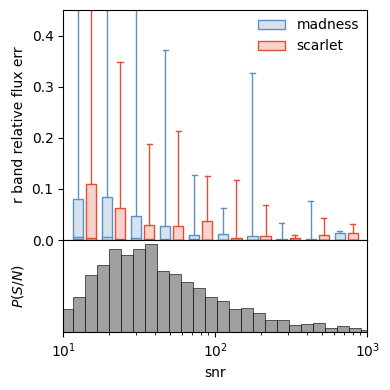

In [ ]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(boxplot_snr_df, 
              x = 'snr', y = "r_relative_flux_err", z = "type",
              xlim = (10, 1000),
              ylim = (-0, 0.45), 
              x_scale = 'log',
              legend = ['madness', 'scarlet'],
              x_label='Signal to noise ratio S/N', 
              y_label = 'r band relative flux err',
              y_label_hist='$P(S/N)$',
              legend_remove = False,
              palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
              nbins = 10)

In [ ]:
madness_results

,u_covariance,u_actual_flux,u_predicted_flux,u_blendedness,g_covariance,g_actual_flux,g_predicted_flux,g_blendedness,r_covariance,r_actual_flux,...,y_phot_flux,y_phot_fluxerrs,y_phot_flags,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err,snr
0,0.990703,4174.720537,2705.405762,0.466214,0.995858,39963.497696,27038.166016,0.424744,0.996769,160378.651599,...,59338.672118,4790.684186,0,-0.351955,-0.323428,-0.286394,-0.400085,-0.317506,-0.298281,40.785521
1,0.994542,1038.079634,5261.806641,0.602536,0.996535,45992.641803,47897.765625,0.249773,0.996432,100291.508781,...,22788.973001,4791.904276,0,4.068789,0.041422,-0.020091,0.220963,0.498540,1.073106,17.761837
2,0.997358,7409.172734,9722.751953,0.002585,0.999438,100889.700146,101184.859375,0.001589,0.999609,407350.040419,...,151651.070214,4795.562684,0,0.312259,0.002926,-0.028692,-0.009354,0.065304,0.078867,95.072195
3,0.992358,3407.119590,3633.226562,0.520547,0.993459,27409.405507,34848.902344,0.562122,0.992896,77119.662098,...,69669.112892,4793.124056,0,0.066363,0.271421,0.837394,0.736010,0.646354,0.732084,20.525018
4,0.993565,1660.370492,1552.410645,0.000634,0.995618,15618.520226,15479.712891,0.000794,0.996035,49917.058211,...,19998.727213,4801.653837,0,-0.065022,-0.008887,0.082751,-0.039918,0.167957,0.285050,11.466837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.997684,3667.618986,4001.511475,0.004303,0.999343,34726.305251,35086.242188,0.006945,0.999456,114407.570195,...,40413.066800,4740.885641,0,0.091038,0.010365,-0.032690,-0.092327,0.112862,0.210365,28.851006
327,0.996694,6324.125555,5130.052246,0.002430,0.999109,50005.386447,45387.328125,0.004963,0.999278,140239.975170,...,66775.945575,4749.331048,0,-0.188812,-0.092351,0.129308,0.049695,-0.130244,-0.131765,27.911577
328,0.843160,467.535769,908.488586,0.079039,0.995565,23219.593798,22900.695312,0.018549,0.999518,185639.888667,...,184522.835128,4739.677926,0,0.943142,-0.013734,0.024181,-0.051124,0.026125,-0.012248,44.871380
329,0.997951,3807.205014,3913.318359,0.001041,0.999018,31433.625098,34930.039062,0.002321,0.998981,104028.054740,...,38385.465312,4749.331048,0,0.027872,0.111232,0.046178,-0.036357,0.146892,0.219305,28.262831


In [ ]:
boxplot_blendedness_df = {}

boxplot_blendedness_df['r_blendedness'] = list(madness_results['r_blendedness'])
boxplot_blendedness_df["type"] = ["madness"] * len(madness_results['size'])
boxplot_blendedness_df["r_relative_flux_err"] = list(np.abs((madness_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)


boxplot_blendedness_df['r_blendedness'].extend(list(scarlet_results['r_blendedness']))
boxplot_blendedness_df["type"].extend(["scarlet"] * len(scarlet_results['size']))
boxplot_blendedness_df["r_relative_flux_err"].extend(list(np.abs((scarlet_results["r_phot_flux"].values - actual_photometry["r_phot_flux"].values)) / actual_photometry["r_phot_flux"].values)) 

boxplot_blendedness_df = pd.DataFrame(boxplot_blendedness_df)

[0.00999    0.01584893 0.02511886 0.03981072 0.06309573 0.1
 0.15848932 0.25118864 0.39810717 0.63095734 1.00001   ]
[8 8 0 ... 0 0 0]
['madness' 'scarlet']
0 madness
1 scarlet


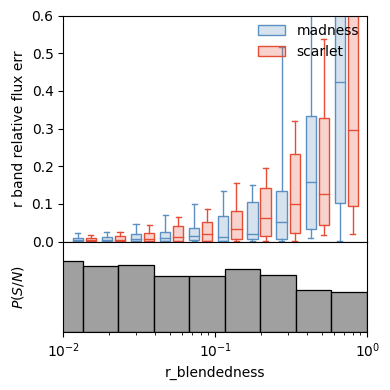

In [ ]:
import maddeb.boxplot
import matplotlib as mpl

fig, median_shear, q1_shear, q3_shear, whislo_shear, whishi_shear = maddeb.boxplot.boxplot_func(boxplot_blendedness_df, 
              x = 'r_blendedness', y = "r_relative_flux_err", z = "type",
              xlim = (.01, 1),
              ylim = (-0, .6), 
              x_scale = 'log',
              legend = ['madness', 'scarlet'],
              x_label='Signal to noise ratio S/N', 
              y_label = 'r band relative flux err',
              y_label_hist='$P(S/N)$',
              legend_remove = False,
              palette=mpl.cm.RdYlBu([0.85,0.15]),#0.35,
              nbins = 10)

In [ ]:
snr_blendedness_df = {}
snr_blendedness_df["snr"] = madness_results['r_band_snr']
snr_blendedness_df["blendedness"] = madness_results['r_blendedness']


<AxesSubplot:>

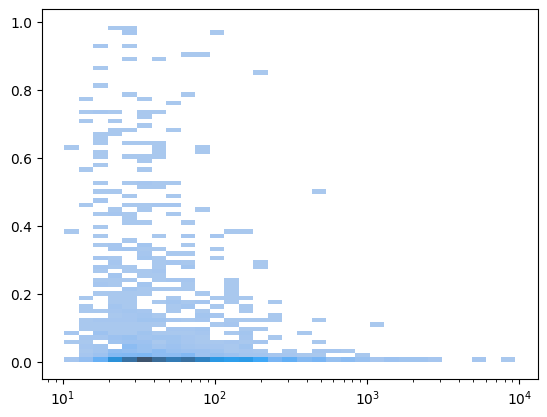

In [ ]:
sns.histplot(x=madness_results['r_band_snr'].values, y=madness_results['r_blendedness'].values, log_scale=[True, False], kde=True)